In [1]:
# !pip install scikit-learn
# !pip install pandas
# !pip install emoji
# !pip install num2words
# !pip install nltk
# !pip install matplotlib
# !pip install wordcloud

In [2]:
import json
import pandas as pd
from sklearn.model_selection import train_test_split
import re
import emoji
from num2words import num2words
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
nltk.download('stopwords')
nltk.download('wordnet')
import matplotlib.pyplot as plt
from collections import defaultdict
from collections import Counter
from matplotlib import colors
# from wordcloud import WordCloud

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Andreea\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Andreea\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [6]:
!pip install ipynb 


[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: C:\Users\tiast\AppData\Local\Programs\Python\Python312\python.exe -m pip install --upgrade pip


In [3]:
from ipynb.fs.full.preprocessor_class import Preprocessor

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Andreea\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Andreea\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [4]:
train_data = pd.read_csv('data/shuffled_train_data.csv',index_col=None)
train_labels = pd.read_csv('data/shuffled_train_labels.csv',index_col=None)

test_data = pd.read_csv('data/test_data.csv',index_col=None)
test_labels = pd.read_csv('data/test_labels.csv',index_col=None)

train_data_plot = pd.read_csv('data/train_data_plot.csv',index_col=None)
test_data_plot = pd.read_csv('data/test_data_plot.csv',index_col=None)

train_data.shape

(45000, 1)

In [5]:
preprocessor = Preprocessor(set(stopwords.words('english')), WordNetLemmatizer(), PorterStemmer(), True, True, True, True, True, False, True, True, True, False)

preprocessed_data = pd.DataFrame(columns=['text'])

preprocessed_data['text'] = train_data.apply(lambda row: preprocessor.preprocess(row.iloc[0]), axis = 1)

preprocessed_data_test = pd.DataFrame(columns=['text'])

preprocessed_data_test['text'] = test_data.apply(lambda row: preprocessor.preprocess(row.iloc[0]), axis = 1)

In [6]:
print(train_data)
print(preprocessed_data)

                                                    text
0                         I love being super comfortable
1      Shave cremes need lather and a feeling of full...
2      I love the bright colors of this dress. The fa...
3      It's see through and so very small. Got curves...
4      My sister loves wolves. Couldn't go wrong with...
...                                                  ...
44995  These sandals were poorly constructed with the...
44996  Wow this shirt is so comfortable and fit. It h...
44997  I have a problem with heel pain (pf) and have ...
44998  Keeps spotting hands and everything with blue ...
44999               lights died right away. poor quality

[45000 rows x 1 columns]
                                                    text
0                             [love, super, comfortable]
1      [shave, cremes, need, lather, feeling, fullnes...
2      [love, bright, color, dress, fabric, nice, fee...
3         [see, small, got, curve, get, fit, like, size]
4    

In [7]:
def plot_cifre_per_clasa(label, color, data_csv, label_csv):
    data_per_clasa = data_csv[data_csv['label'] == label]

    digit_frequencies = {str(i): 0 for i in range(10)}

    for text in data_per_clasa['reviewText']:
        for char in text:
            if char.isdigit():
                digit_frequencies[char] += 1
    
    labels = list(digit_frequencies.keys())
    frequencies = list(digit_frequencies.values())
    
    plt.bar(labels, frequencies, color=color)
    
    plt.xlabel("Digits")
    plt.ylabel("Frequency")
    plt.title(f"The distribution of digits in the {label} class on {label_csv}")
    plt.show()

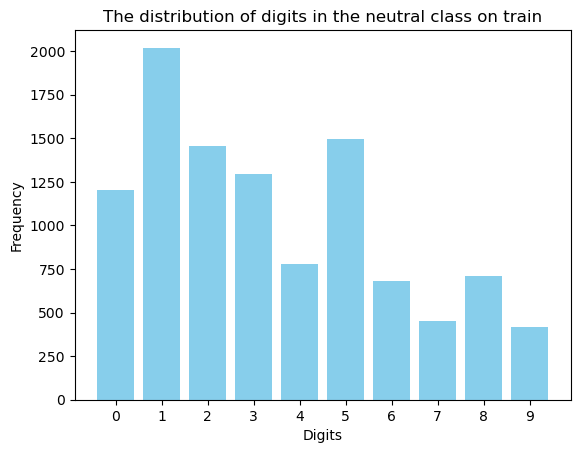

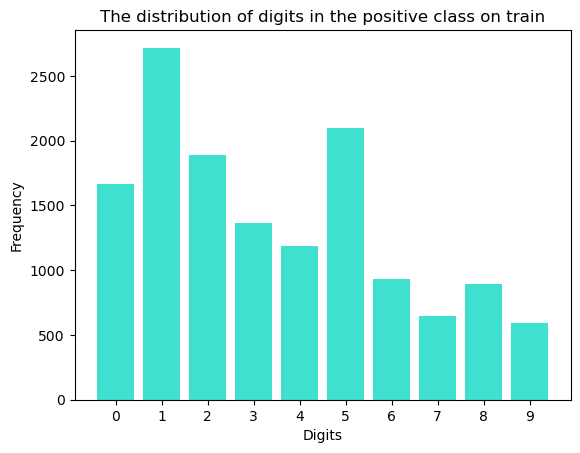

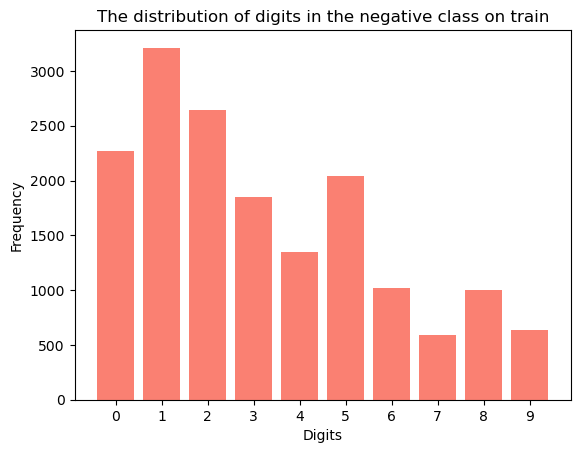

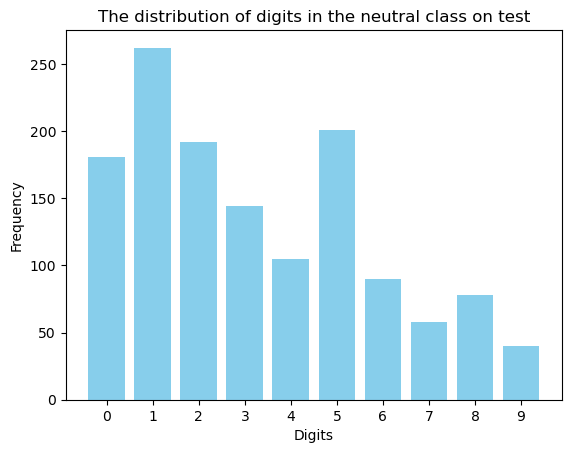

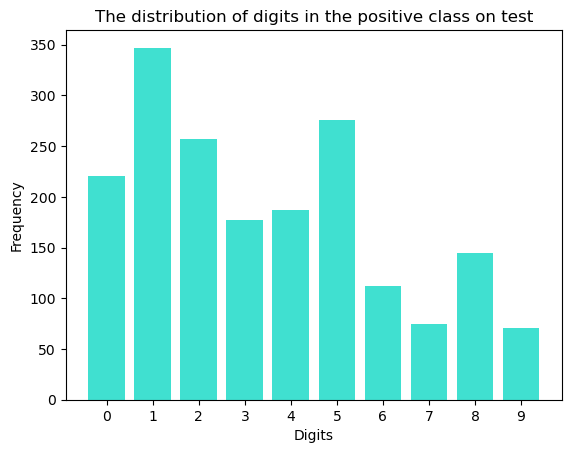

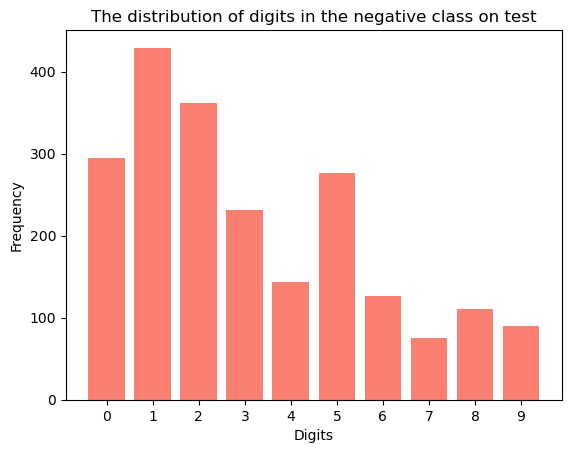

In [8]:
plot_cifre_per_clasa('neutral', 'skyblue', train_data_plot, 'train')
plot_cifre_per_clasa('positive', 'turquoise', train_data_plot, 'train')
plot_cifre_per_clasa('negative', 'salmon', train_data_plot, 'train')

plot_cifre_per_clasa('neutral', 'skyblue', test_data_plot, 'test')
plot_cifre_per_clasa('positive', 'turquoise', test_data_plot, 'test')
plot_cifre_per_clasa('negative', 'salmon', test_data_plot, 'test')

In [9]:
stop_words = set(stopwords.words('english'))

def plot_stopwords_per_clasa(label, color, data_csv, label_csv):
    data_per_clasa_words = data_csv[data_csv['label'] == label]['reviewText'].str.split()
   
    stops_count = defaultdict(int)
    for words in data_per_clasa_words:
        for word in words:
            if word.lower() in stop_words:
                stops_count[word] += 1
  
    stops_count = sorted(stops_count.items(), key= lambda x: x[1], reverse=True)
    stops_count = dict(stops_count[:15])
    
    plt.bar(stops_count.keys(), stops_count.values(), color=color)    
    plt.xlabel("Stopword")
    plt.ylabel("Frequency")
    plt.title(f"The distribution of the 15 most frequent stopwords in the {label} class on {label_csv}")
    plt.show() 

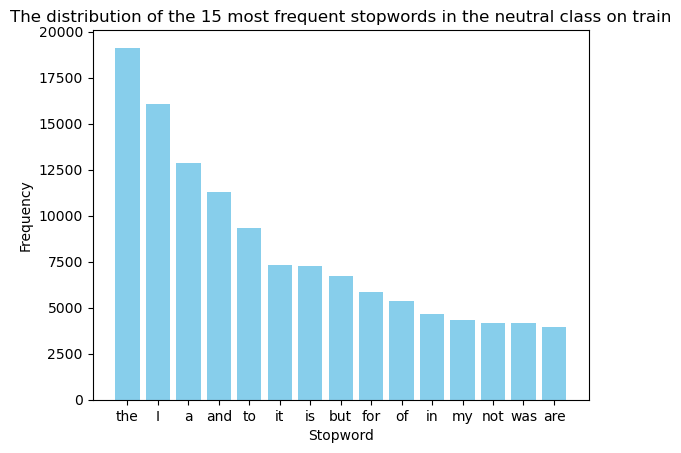

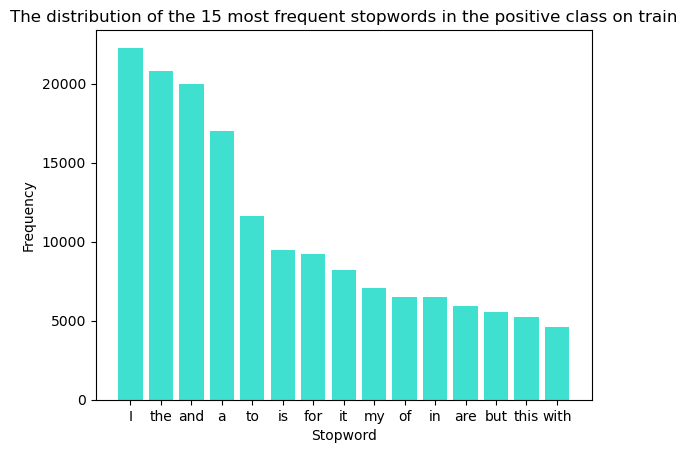

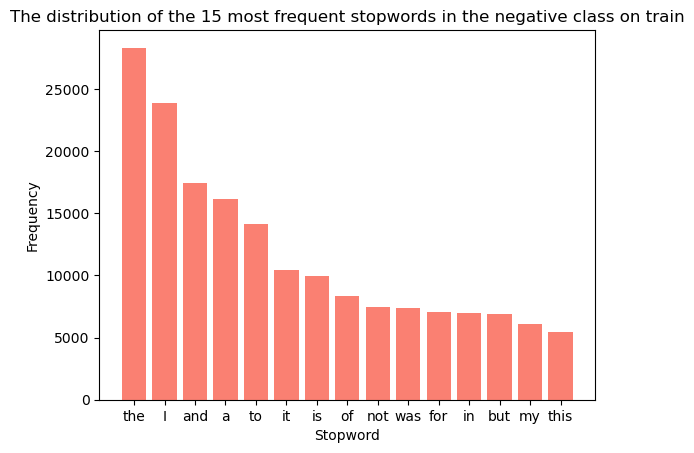

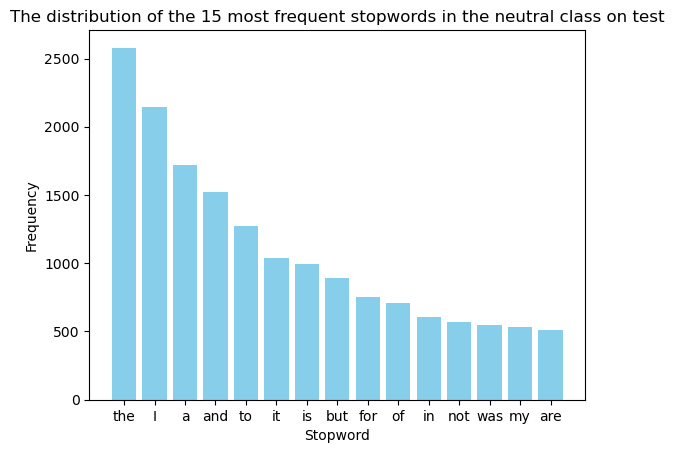

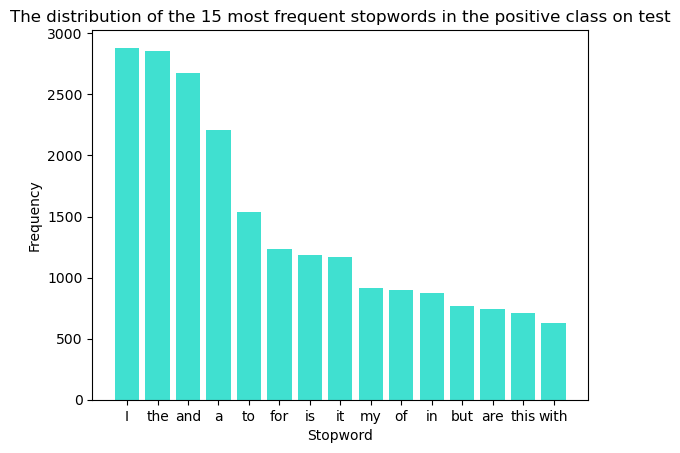

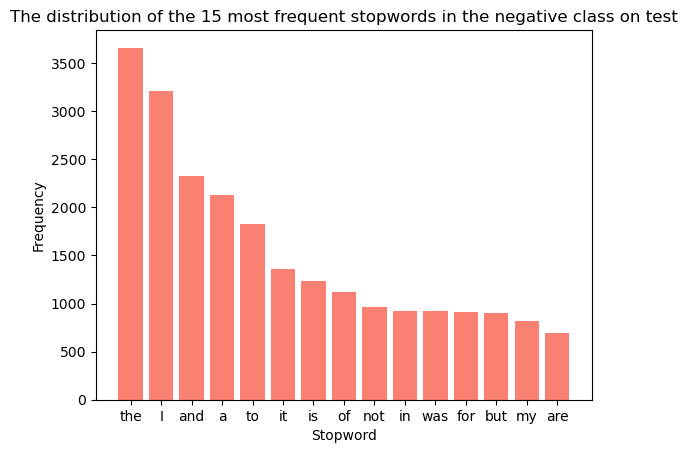

In [10]:
plot_stopwords_per_clasa('neutral', 'skyblue', train_data_plot, 'train')
plot_stopwords_per_clasa('positive', 'turquoise', train_data_plot, 'train')
plot_stopwords_per_clasa('negative', 'salmon', train_data_plot, 'train')

plot_stopwords_per_clasa('neutral', 'skyblue', test_data_plot, 'test')
plot_stopwords_per_clasa('positive', 'turquoise', test_data_plot, 'test')
plot_stopwords_per_clasa('negative', 'salmon', test_data_plot, 'test')

In [29]:
def autopct_format(values):
    def my_format(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{:.1f}%\n({v:d})'.format(pct, v=val)
    return my_format

def class_distribution(df, title):
    label_counts = df['label'].value_counts()
    
    plt.pie(label_counts, labels = label_counts.index, autopct=autopct_format(label_counts))
    plt.xlabel('')
    plt.ylabel('')
    plt.title('Class Distribution on ' + title + ' Data')
    
    plt.show()
    
    rating_counts = df['overall'].value_counts()
    
    rating_counts.plot(kind='bar')
    plt.xlabel('Review')
    plt.ylabel('Number of Reviews')
    plt.title('Rating Distribution on ' + title + ' Data')
    plt.xticks(rotation=45, ha='right')
    
    
    plt.show()

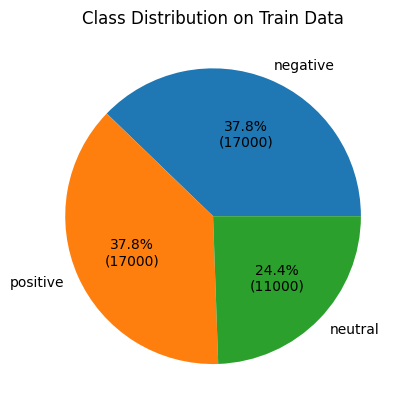

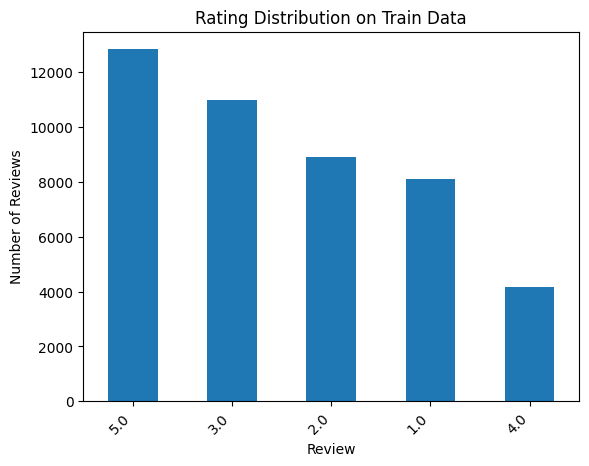

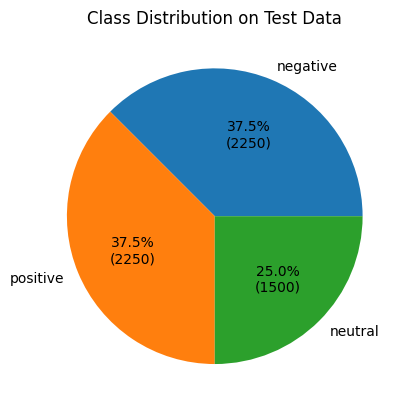

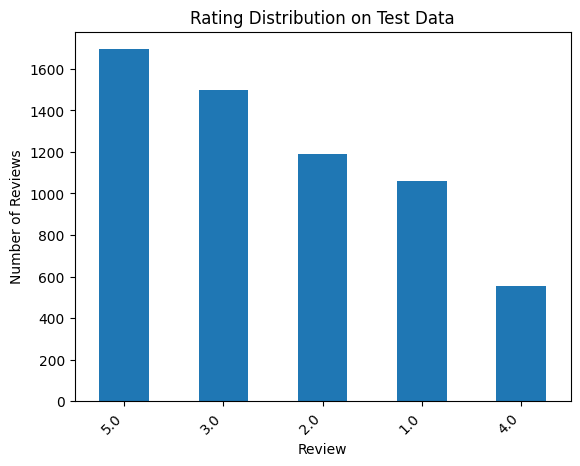

In [30]:
class_distribution(train_data_plot, "Train")
class_distribution(test_data_plot, "Test")

In [31]:
def count_punctuation(df):
    
    for i, label in enumerate(df['label'].unique()):
        df_label = df[df['label'] == label]
        
        punctuation_list = df_label['reviewText'].apply(lambda text: re.findall(r'[^\w\s]', text)).explode().tolist()
    
        top_punctuation = pd.Series(punctuation_list).value_counts().nlargest(10)
        top_punctuation.plot(kind='bar')
        plt.xlabel('Punctuation Mark')
        plt.ylabel('Count')
        plt.title(f'Punctuation Distribution for Label: {label}')
        plt.xticks(rotation=45, ha='right')
    
        plt.show()

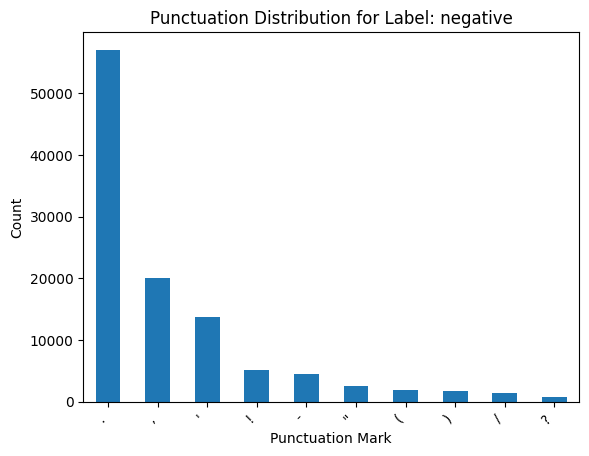

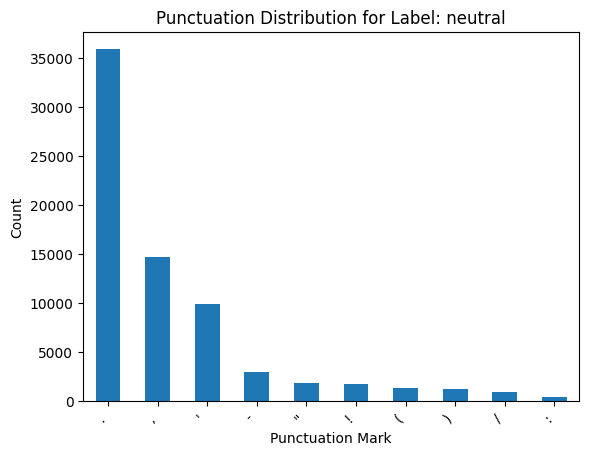

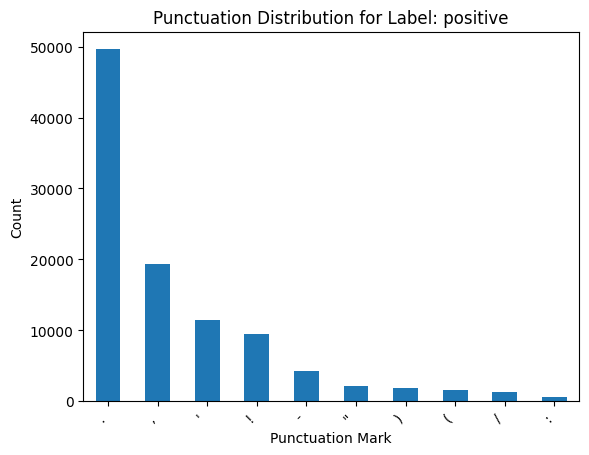

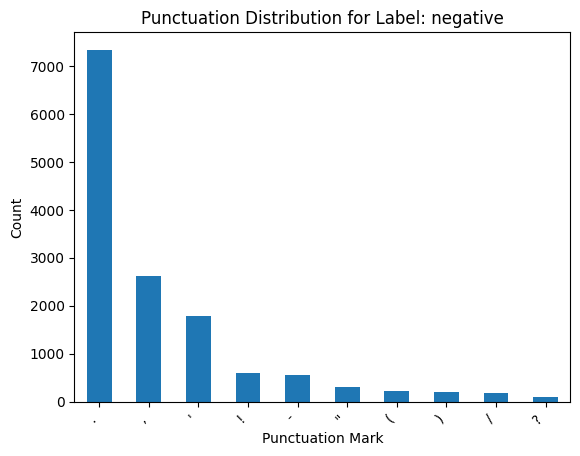

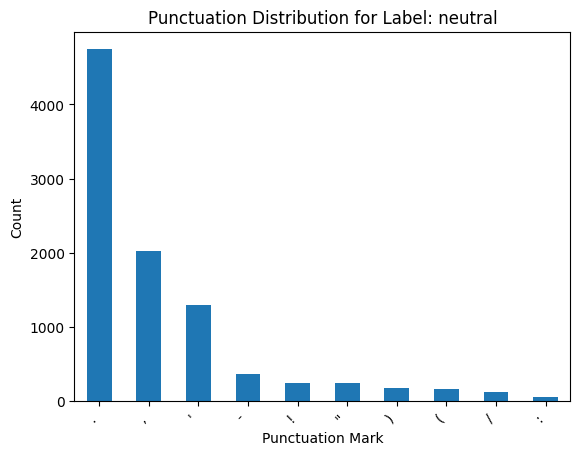

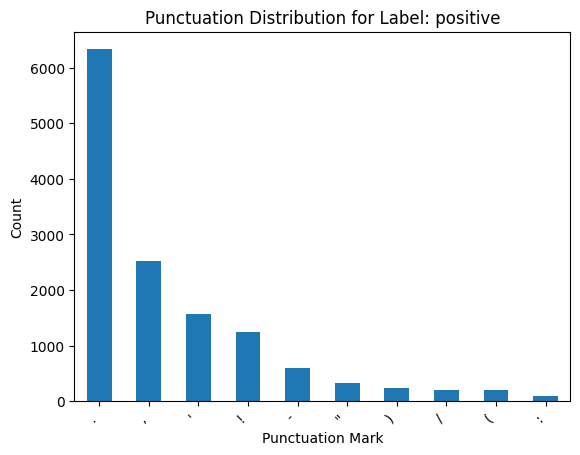

In [32]:
count_punctuation(train_data_plot)
count_punctuation(test_data_plot)

In [11]:
def plot_reviews_length(data_csv, label_csv):
    data_per_clasa = data_csv

    maximum_review = {1: 0, 2: 0, 3: 0, 4: 0, 5: 0}
    maximum_review_per_class = {'positive':0, 'negative':0, 'neutral':0}
    
    for index, row in data_per_clasa.iterrows():
        review_text = row['reviewText']
        words = review_text.split()

        lenght_of_review = len(words)

        if maximum_review[row['overall']] < lenght_of_review:
            maximum_review[row['overall']] = lenght_of_review
        if maximum_review_per_class[row['label']] < lenght_of_review:
            maximum_review_per_class[row['label']] = lenght_of_review    
            
    ratings = list(maximum_review.keys())
    lengths = list(maximum_review.values())

    # Plotting
    plt.plot(ratings, lengths, color='hotpink', marker='*',label='')
    plt.xlabel('Rating')
    plt.ylabel('Maximum Review Length')
    plt.title(f'Maximum Review Length for each Rating ({label_csv})')
    plt.xticks(ratings) 
    plt.show()
    
    print(maximum_review_per_class)
    ratings = list(maximum_review_per_class.keys())
    lengths = list(maximum_review_per_class.values())

    # Plotting
    plt.bar(ratings, lengths, color=['turquoise','salmon','skyblue'])
    plt.xlabel('Label')
    plt.ylabel('Maximum Review Length')
    plt.title(f'Maximum Review Length for each Label ({label_csv})')
    plt.show()

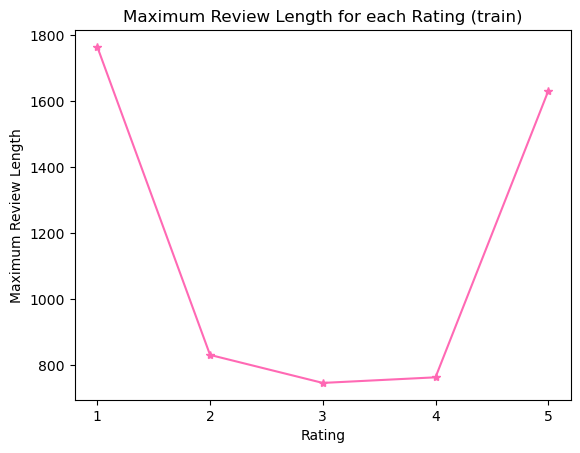

{'positive': 1631, 'negative': 1765, 'neutral': 745}


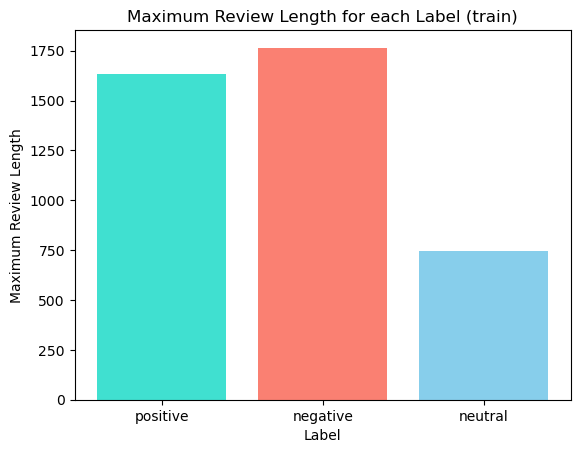

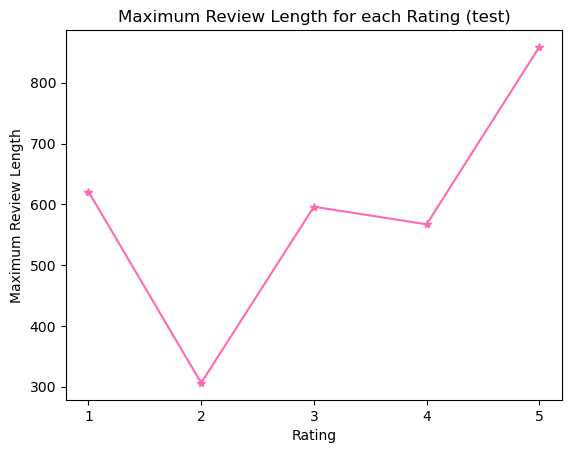

{'positive': 859, 'negative': 621, 'neutral': 596}


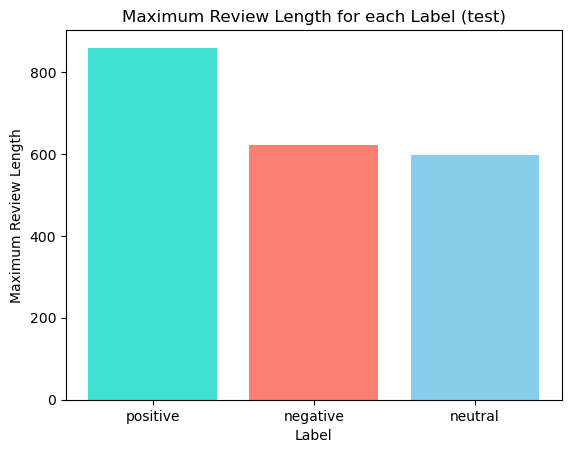

In [12]:
plot_reviews_length(train_data_plot, 'train')
plot_reviews_length(test_data_plot, 'test')

In [16]:
def generate_wordcloud(df):
    wordcloud = WordCloud(max_font_size=50, max_words=3000, background_color="white")
    # tags = [", ".join(df["text"])]
    tokens = df["text"].apply(lambda x: ",".join(x) if isinstance(x, list) else x)
    print( df["text"])  
    # Concatenate all strings in the "text" column
    text = tokens.dropna().values
    wordcloud_picture = wordcloud.generate(", ".join(text))
  
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

0                               [love, super, comfortable]
1        [shave, cremes, need, lather, feeling, fullnes...
2        [love, bright, color, dress, fabric, nice, fee...
3           [see, small, got, curve, get, fit, like, size]
4        [sister, love, wolf, go, wrong, cute, comfy, w...
                               ...                        
44995    [sandal, poorly, constructed, base, shoe, fitt...
44996    [wow, shirt, comfortable, fit, hug, body, soft...
44997    [problem, heel, pain, pf, looking, good, walki...
44998    [keep, spotting, hand, everything, blue, ink, ...
44999            [light, died, right, away, poor, quality]
Name: text, Length: 45000, dtype: object


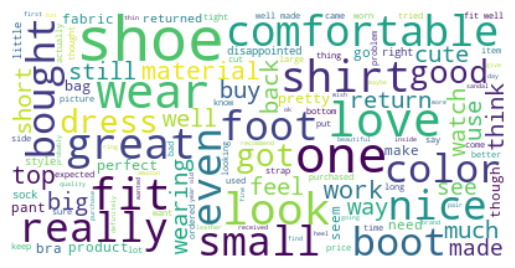

0                       [poorly, made, shrink, fit, well]
1       [playing, santa, year, authentic, high, qualit...
2       [bought, two, one, better, shipping, schedule,...
3       [came, box, scratch, one, lense, know, inexpen...
4       [okay, kind, hard, explain, really, liked, ski...
                              ...                        
5995    [christmas, gift, boyfriend, nice, wallet, app...
5996            [better, expected, pleasantly, surprised]
5997    [skirt, awsome, arrived, real, quick, lb, skir...
5998    [excellent, piece, elegant, sturdy, design, lo...
5999                            [wonderful, beach, shirt]
Name: text, Length: 6000, dtype: object


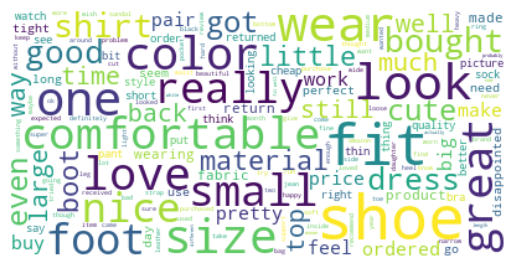

In [20]:
generate_wordcloud(preprocessed_data)
generate_wordcloud(preprocessed_data_test)

In [13]:
#N-grame
from nltk import FreqDist
from nltk.tokenize import word_tokenize

In [14]:
def plot_bigrams_trigrams(data_csv, label_csv):
    stop_words = set(stopwords.words('english')) 
    tokens = [word for text in data_csv['reviewText'] for word in word_tokenize(text.lower()) if word.isalpha() and word not in stop_words]

    # Generare bigrame
    bigrame = list(nltk.bigrams(tokens))
    frecventa_bigrame = FreqDist(bigrame)
    top_15_bigrame = frecventa_bigrame.most_common(15)
    
    values = []
    labels = []
    for el in top_15_bigrame:
        #un element are forma (('well', 'made'), 889)
        labels.append(el[0][0] + " " + el[0][1])
        values.append(el[1])
    
    plt.bar(labels, values, color='pink')
    plt.xlabel('Bigrams')
    plt.ylabel('Frequency')
    plt.title(f"The most common 15 bigrams on {label_csv}")
    plt.xticks(rotation=45, ha='right') 
    plt.tight_layout() 
    plt.show()
    
    # Generare trigrame
    trigrams = list(nltk.trigrams(tokens))
    frecventa_trigrams = FreqDist(trigrams)
    top_15_trigrams = frecventa_trigrams.most_common(15)
    
    values = []
    labels = []
    for el in top_15_trigrams:
        #un element are forma (('fit', 'true', 'size'), 90)
        labels.append(el[0][0] + " " + el[0][1] + " " + el[0][2])
        values.append(el[1])
    
    plt.bar(labels, values, color='moccasin')
    plt.xlabel('Trigrams')
    plt.ylabel('Frequency')
    plt.title(f"The most common 15 trigrams on {label_csv}")
    plt.xticks(rotation=45, ha='right') 
    plt.tight_layout() 
    plt.show()

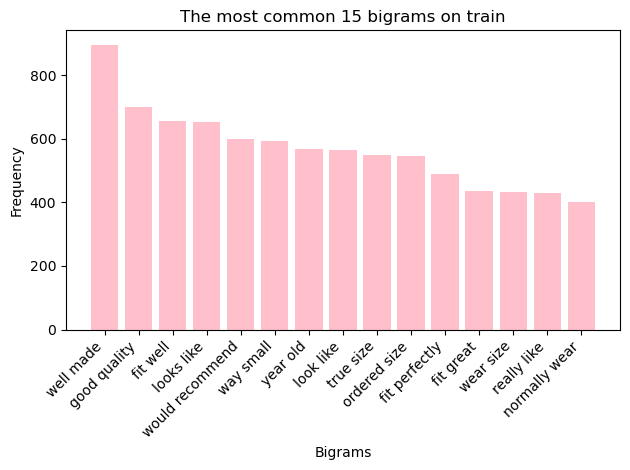

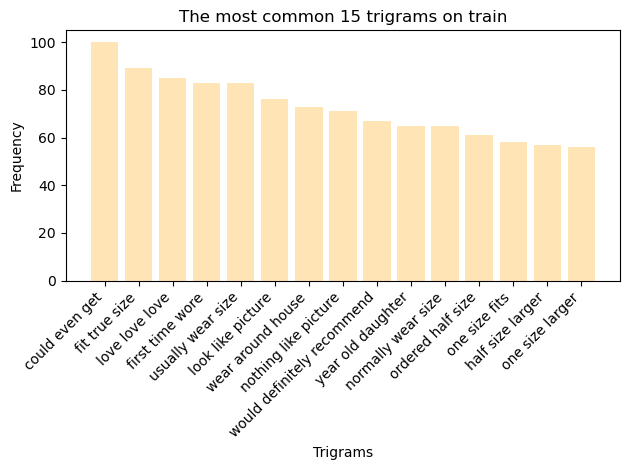

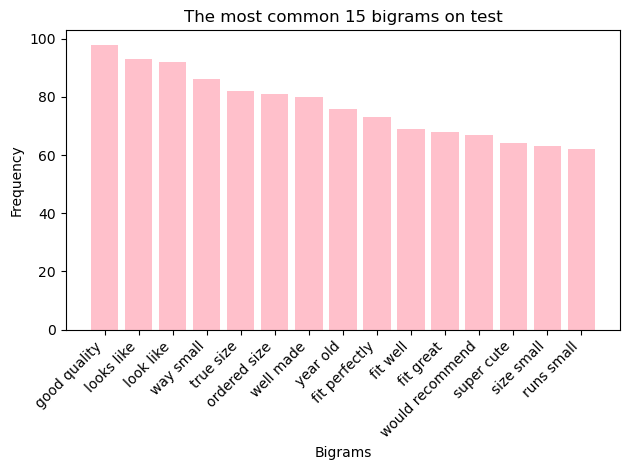

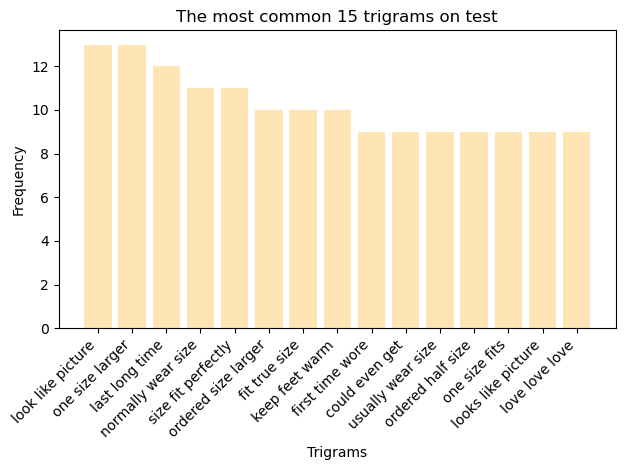

In [15]:
plot_bigrams_trigrams(train_data_plot, 'train')
plot_bigrams_trigrams(test_data_plot, 'test')

In [6]:
nltk.download()


KeyboardInterrupt



In [24]:
pos_tags_labels = {
    'ADJ': 'Adjective',
    'ADP': 'Adposition',
    'ADV': 'Adverb',
    'CONJ': 'Conjuction',
    'DET': 'Determiner/Article',
    'NOUN': 'Noun',
    'NUM': 'Numeral',
    'PRT': 'Particle',
    'PRON': 'Pronoun',
    'VERB': 'Verb',
    '.': 'Punctuation mark',
    'X': 'Other'
}

In [25]:
def get_pos_tags(texts):
    data = []
  
    for text in texts:
        pos_tags = Counter([j for _, j in nltk.pos_tag(nltk.word_tokenize(text), tagset = 'universal')])
        data.append(pos_tags)
      
    df = pd.DataFrame(data).fillna(0)
    return df

In [26]:
df_review_pos_train = get_pos_tags(train_data_plot['reviewText'].values)
df_review_pos_test = get_pos_tags(test_data_plot['reviewText'].values)

In [27]:
print(df_review_pos_train)

       PRON  VERB   DET  NOUN  NUM  ADV  ADJ  ADP     .  CONJ  PRT    X
0       4.0   8.0   5.0   3.0  2.0  2.0  4.0  2.0   2.0   1.0  0.0  0.0
1       0.0   3.0   0.0   0.0  0.0  0.0  1.0  0.0   0.0   0.0  1.0  0.0
2       6.0   7.0  10.0  12.0  0.0  8.0  1.0  2.0  11.0   1.0  2.0  0.0
3       6.0  20.0  10.0  20.0  0.0  5.0  5.0  8.0  10.0   2.0  2.0  0.0
4       8.0  13.0   3.0   7.0  0.0  3.0  3.0  5.0   6.0   2.0  0.0  1.0
...     ...   ...   ...   ...  ...  ...  ...  ...   ...   ...  ...  ...
44995   2.0   4.0   3.0   3.0  2.0  2.0  1.0  0.0   2.0   1.0  1.0  0.0
44996   1.0   1.0   1.0   5.0  1.0  0.0  1.0  1.0   2.0   1.0  1.0  0.0
44997   1.0   1.0   1.0   5.0  0.0  1.0  3.0  2.0   3.0   1.0  0.0  0.0
44998   2.0   3.0   0.0   3.0  0.0  2.0  1.0  0.0   2.0   0.0  2.0  0.0
44999   1.0   1.0   2.0   4.0  0.0  2.0  0.0  1.0   4.0   0.0  0.0  0.0

[45000 rows x 12 columns]


In [28]:
def frequency_pos_plot(df):
    fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(16, 12))
    fig.suptitle('Frequencies of pos tags per review')

    for i, column in enumerate(df.columns):
        ax = axes.flatten()[i]
        values = df[column].values
       
        n, bins, patches = ax.hist(values, bins=10)
        fracs = ((n ** (1 / 3)) / n.max())
        norm = colors.Normalize(fracs.min(), fracs.max())
        for thisfrac, thispatch in zip(fracs, patches):
            color = plt.cm.viridis(norm(thisfrac))
            thispatch.set_facecolor(color)
  
        ax.set_xlabel('Part-of-speech tag')
        ax.set_ylabel('POS frequencies')
        ax.set_title(pos_tags_labels[column])

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show() 

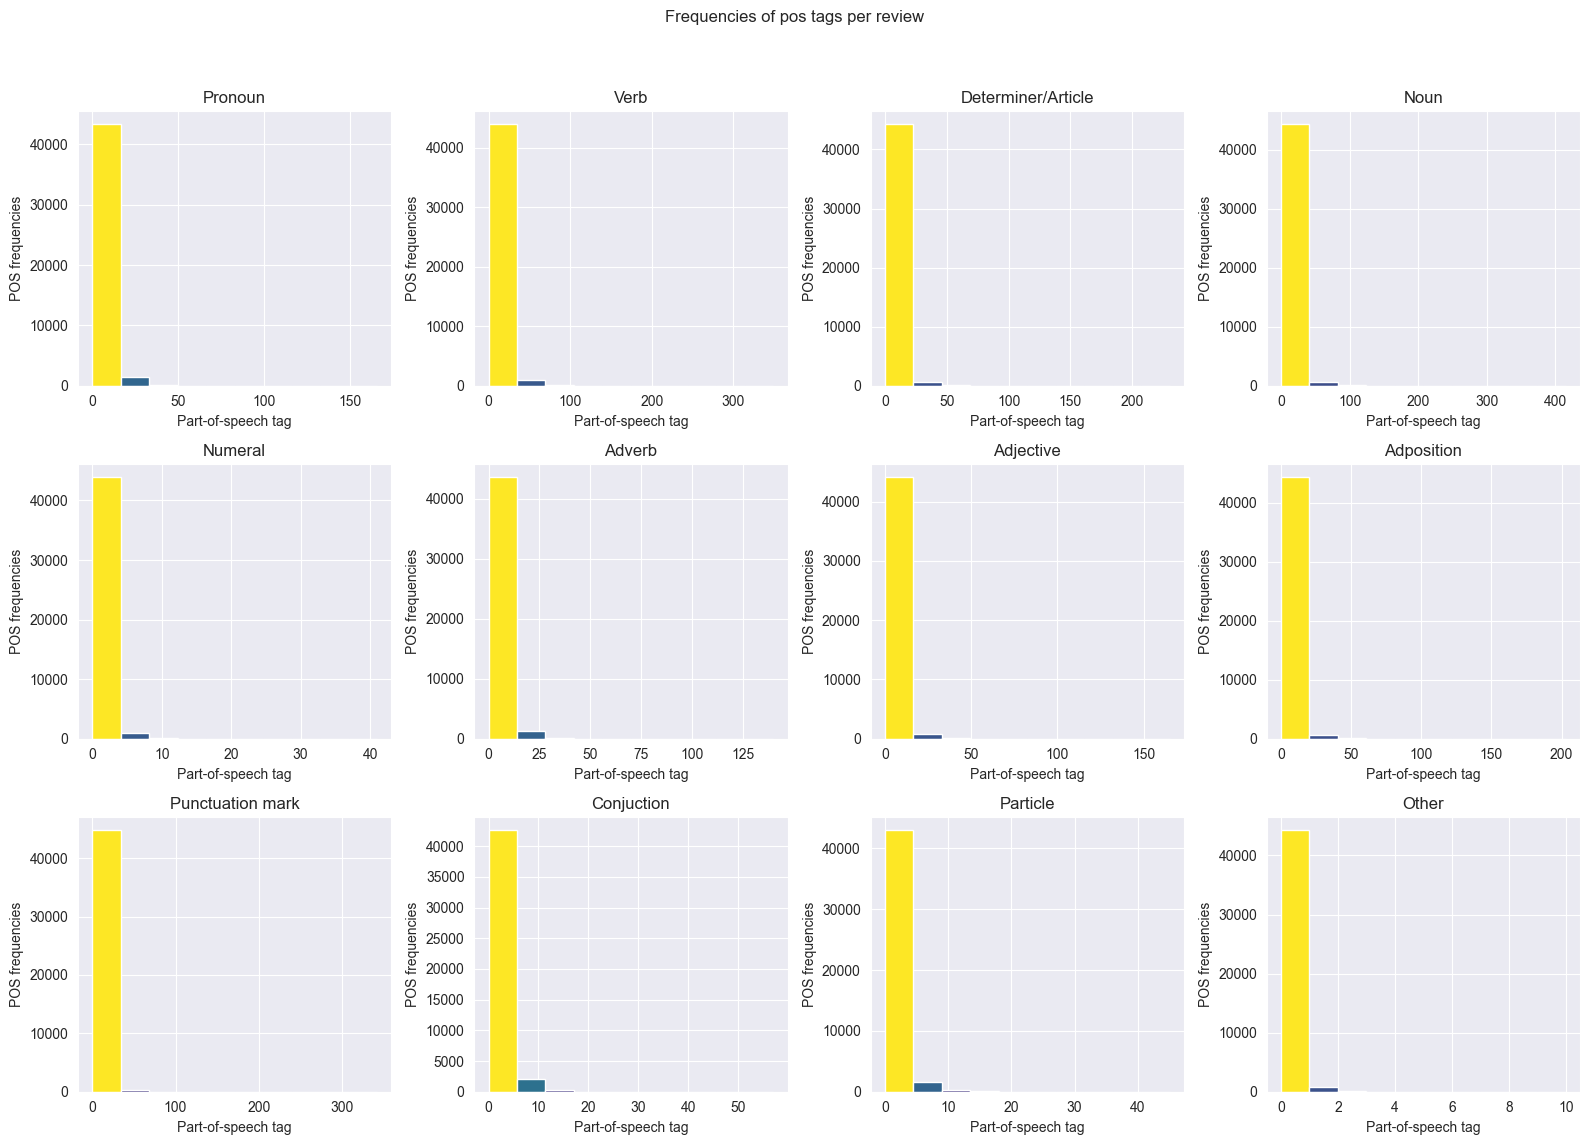

In [29]:
frequency_pos_plot(df_review_pos_train)

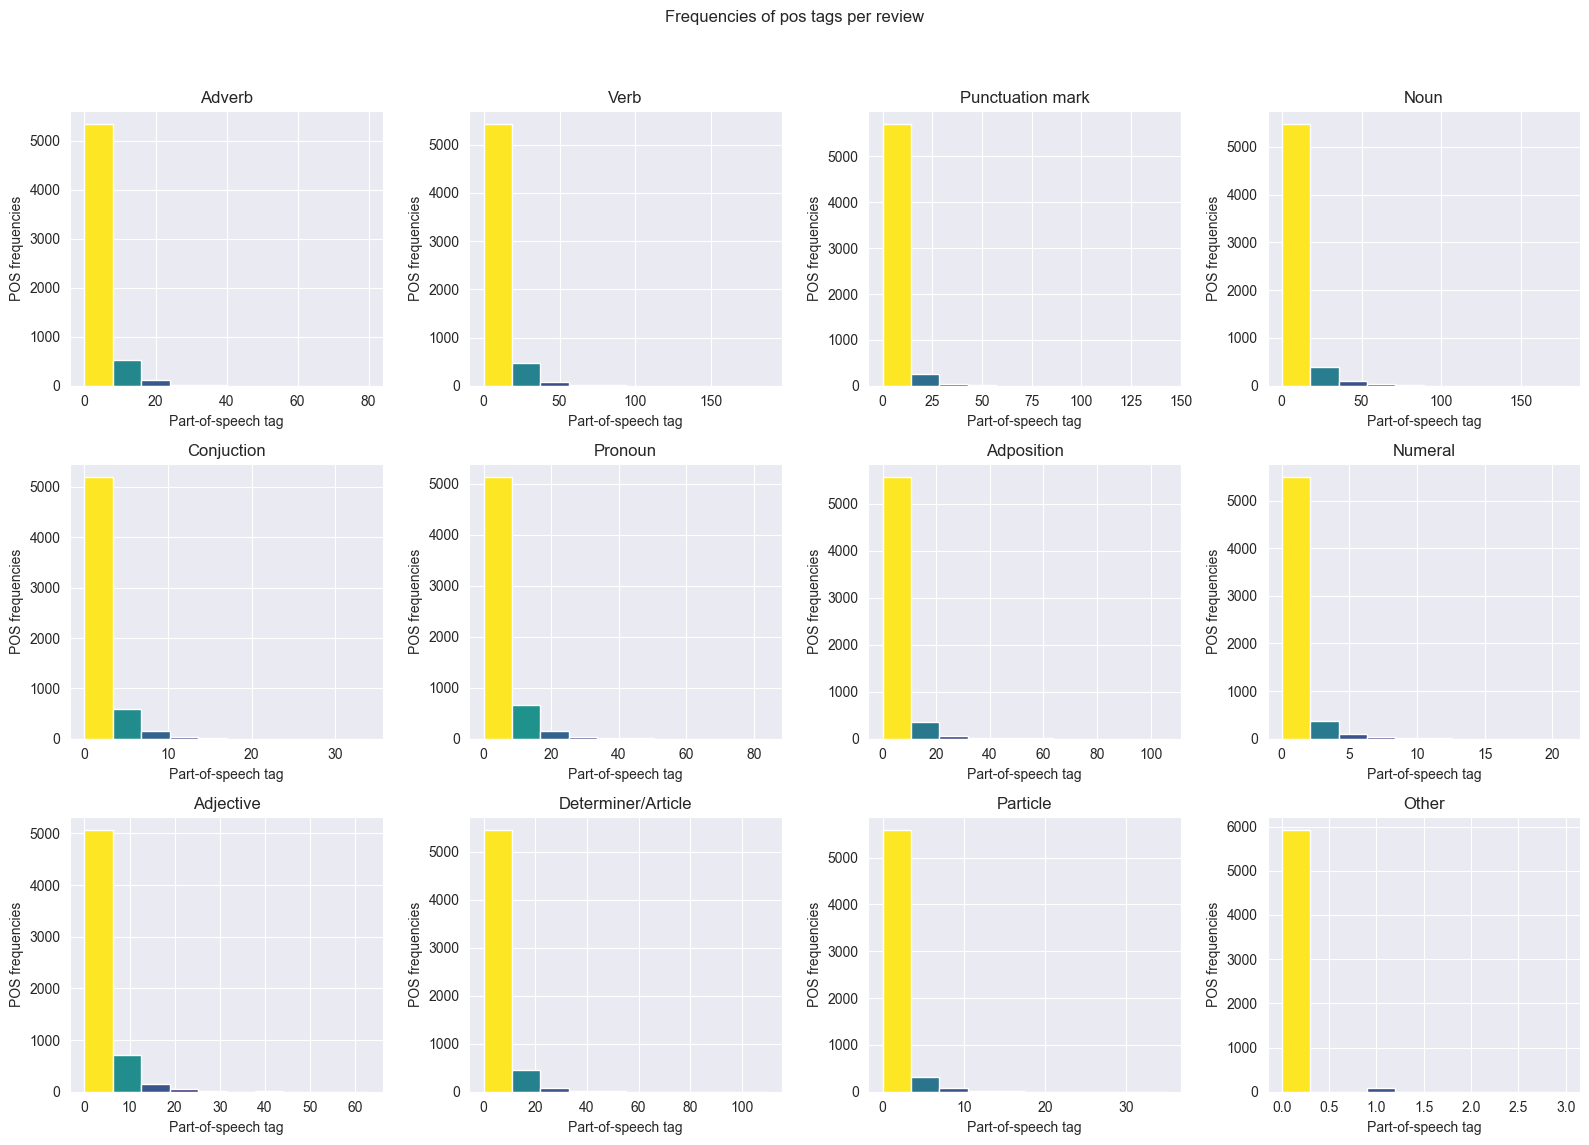

In [30]:
frequency_pos_plot(df_review_pos_test)